# Videogames Market Study

## Project Description
You work at "Stream", an online store that sells computer games worldwide. Historical data on game sales, user and expert ratings, genres, and platforms (such as Xbox or PlayStation) are available from public sources. In this project, you aim to identify patterns that determine the success of a game. This will allow you to bet on potentially popular products and plan advertising campaigns. The available data goes up until 2016. Let's assume it is currently December 2016, and you are planning the campaign for 2017.

### Project Goal
To identify patterns that determine the success of a game.

### Data Description

`Name` — game name

`Platform` — platform

`Year_of_Release` — release year

`Genre` — game genre

`NA_sales` — sales in North America (millions of copies sold)

`EU_sales` — sales in Europe (millions of copies sold)

`JP_sales` — sales in Japan (millions of copies sold)

`Other_sales` — sales in other countries (millions of copies sold)

`Critic_Score` — critic score (maximum 100)

`User_Score` — user score (maximum 10)

`Rating` — rating from the Entertainment Software Rating Board (ESRB). This association determines the rating of computer games and assigns them an appropriate age category

**Data for 2016 may be incomplete**

## Content

### Data Research

### Data Preprocessing
 - Replace column names (convert them to lowercase)
 - Convert data types
 - Handle missing values
 - Calculate total sales in all regions and store them in a separate column
 
### Data Analysis
- Let's see how many games were released in different years. Are data from all periods important?
- Examine how sales have changed across platforms. Select platforms with the highest total sales and plot their distribution by year. What is the typical lifespan for the emergence and disappearance of platforms?
- Take data for the corresponding relevant period. Determine the relevant period based on the previous research. The main factor is that this data will help us make forecasts for 2017.
- Exclude data from previous years from your analysis.
- Which platforms are leading in sales, growing, or declining? Choose a few potentially profitable platforms.
- Create a box plot of global game sales by platform. Describe the results.
- Analyze the impact of user and critic reviews on sales within a popular platform. Create a scatter plot and calculate the correlation between reviews and sales. Formulate your conclusions.
- Relate the conclusions to game sales on other platforms.
- Examine the overall distribution of games by genre. What can be said about the most profitable genres? Are there any genres with high or low sales that stand out?

### Tasks
 **1. Creating a profile of the typical user for each region.**
- Let's analyze each region (NA, EU, JP) for the following:
- The most popular platforms (top 5). Describe the differences in sales share.
- The most popular genres (top 5). Explain the differences.
- Does the ESRB rating affect sales in individual regions?
 
 **2. Hypothesis testing**
- The average user ratings for Xbox One and PC platforms are the same.
- The average user ratings for Action and Sports genres are different.
- Set a threshold value for alpha independently.
Explain:
- How did you formulate the null and alternative hypotheses?
- What criterion did you apply to test the hypotheses and why.

## Data Research

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Let's check for duplicates:**
Here, the "id" refers to the game's name, which is represented in the column "name."
We will selectively check the most frequently occurring names.
We can see that the names are repeated because the game has been ported to different platforms, meaning they are not duplicates.
Therefore, there are no duplicates in the data.

In [6]:
data['Name'].value_counts()

Need for Speed: Most Wanted    12
Ratatouille                     9
FIFA 14                         9
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
                               ..
Naruto: Ninja Council           1
Monster Hunter                  1
NCAA GameBreaker 2004           1
We Cheer 2                      1
Homeworld 2                     1
Name: Name, Length: 11559, dtype: int64

In [7]:
data[data['Name'] == 'LEGO Marvel Super Heroes']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
730,LEGO Marvel Super Heroes,X360,2013.0,Action,1.24,0.79,0.00,0.19,80.0,7.6,E10+
945,LEGO Marvel Super Heroes,PS3,2013.0,Action,0.77,0.76,0.01,0.29,82.0,7.9,E10+
1139,LEGO Marvel Super Heroes,PS4,2013.0,Action,0.59,0.76,0.01,0.26,83.0,7.7,E10+
1959,LEGO Marvel Super Heroes,XOne,2013.0,Action,0.61,0.35,0.00,0.09,NaN,6.8,E10+
2313,LEGO Marvel Super Heroes,3DS,2013.0,Action,0.42,0.36,0.04,0.07,61.0,5.2,E10+
2778,LEGO Marvel Super Heroes,WiiU,2013.0,Action,0.31,0.35,0.02,0.06,82.0,8,E10+
3876,LEGO Marvel Super Heroes,PSV,2013.0,Action,0.11,0.29,0.00,0.11,NaN,NaN,NaN
5054,LEGO Marvel Super Heroes,DS,2013.0,Action,0.22,0.13,0.00,0.03,NaN,4.8,E10+
8369,LEGO Marvel Super Heroes,PC,2013.0,Action,0.04,0.12,0.00,0.01,78.0,8.1,E10+


In [8]:
data[data['Name'] == 'FIFA Soccer 13']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
81,FIFA Soccer 13,PS3,2012.0,Action,1.06,5.01,0.13,1.97,88.0,6.6,E
190,FIFA Soccer 13,X360,2012.0,Action,1.09,3.47,0.03,0.57,90.0,6.1,E
2945,FIFA Soccer 13,Wii,2012.0,Action,0.18,0.44,0.00,0.07,NaN,1.6,E
4153,FIFA Soccer 13,WiiU,2012.0,Action,0.17,0.27,0.00,0.04,69.0,6.2,E
4438,FIFA Soccer 13,PSV,2012.0,Action,0.00,0.28,0.05,0.11,57.0,4.1,E
4821,FIFA Soccer 13,PC,2012.0,Action,0.02,0.31,0.00,0.07,86.0,6.6,E
5300,FIFA Soccer 13,PSP,2012.0,Action,0.05,0.18,0.02,0.09,NaN,3.2,E
6028,FIFA Soccer 13,3DS,2012.0,Action,0.06,0.20,0.00,0.03,68.0,3.7,E


**Conclusion for Data Research:**

It is necessary to:
1. Convert column names to lowercase.
2. Remove missing values in the columns: name, year_of_release, genre.
3. Convert the data types of year_of_release to integer and user_score to float.
4. Fill in the missing values in the rating column with the value "Unknown".

## Data Preprocessing

In [9]:
data.columns = data.columns.str.lower()
#check
data.head();

In [10]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])
#check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**We will not fill in the missing values in critic_score, user_score, and rating because there are too many of them, and it would heavily distort the existing data.
We will delete the remaining missing values as they are few in number.**

**We will fill in the missing values in the rating column with a dummy value.**

In [11]:
#check
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [12]:
data.loc[data['rating'].isna(), 'rating'] = 'Unknown'

In [13]:
#check
data.rating.unique()

array(['E', 'Unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

**"tbd" stands for "to be discovered/developed," indicating that the rating is not determined at the current moment. There are quite a few of these values, as we can see below, with a count of 2424. Filling them would be incorrect, so we will leave them as they are.**

In [14]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
data[data['user_score'] == 'tbd']['user_score'].count()

2376

**Change the data types of existing values in user_score to float and year_of_release to int:**

In [16]:
data.loc[data['user_score']=='tbd', 'user_score'] = data.loc[data['user_score'].isna(), 'user_score']

In [17]:
data.loc[data['user_score'].notna(), 
         'user_score'] = data.loc[data['user_score'].notna(), 
                                  'user_score'].astype(float)

In [18]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [19]:
#check
data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


In [20]:
#Calculate the total sales in all regions and write them in a separate column.
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
#check
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


In [21]:
data[(data['platform'] == 'WiiU') & (data['year_of_release'] > 2006) & (data['total_sales'] > 0.3)].count()

name               63
platform           63
year_of_release    63
genre              63
na_sales           63
eu_sales           63
jp_sales           63
other_sales        63
critic_score       51
user_score         52
rating             63
total_sales        63
dtype: int64

## Data analysis

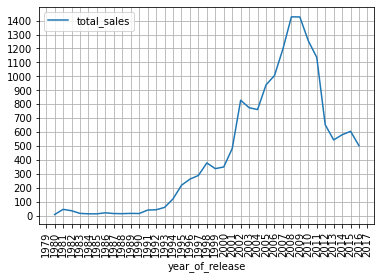

In [22]:
# Let's see how many games were released in different years.
data.pivot_table(index='year_of_release', values='total_sales', aggfunc='count').plot(kind='line', grid=True, rot=90)
plt.locator_params(axis='x', nbins = 60)
plt.locator_params(axis='y', nbins = 30)

In [23]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

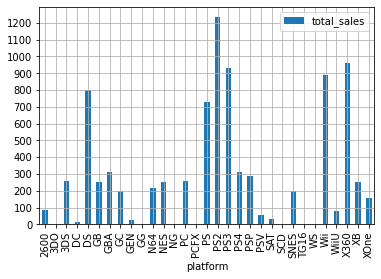

In [24]:
# Let's observe how sales have changed across platforms.
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, rot=90)
plt.locator_params(axis='y', nbins = 20)

**Conclusion from the chart:**
the platforms with the highest total sales are PS2, X360, PS3, Wii, DS, and PS.

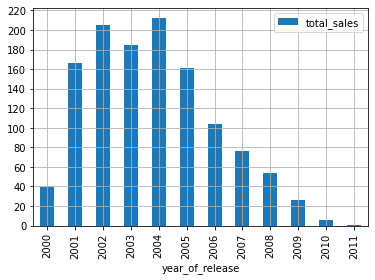

In [25]:
data[data['platform']=='PS2'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, rot=90)
plt.locator_params(axis='y', nbins = 20)

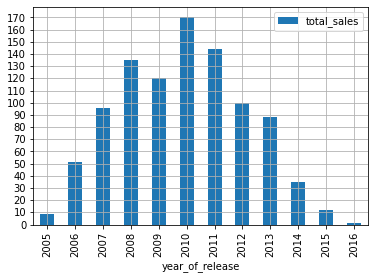

In [26]:
data[data['platform']=='X360'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, rot=90)
plt.locator_params(axis='y', nbins = 20)

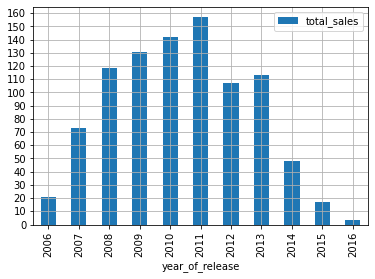

In [27]:
data[data['platform']=='PS3'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, rot=90)
plt.locator_params(axis='y', nbins = 20)

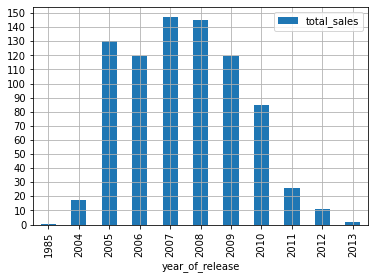

In [28]:
data[data['platform']=='DS'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, rot=90)
plt.locator_params(axis='y', nbins = 20)

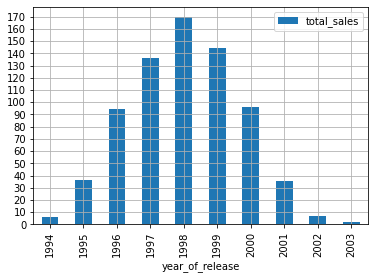

In [29]:
data[data['platform']=='PS'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, rot=90)
plt.locator_params(axis='y', nbins = 20)

**Conclusion from the charts:**
It can be observed that the life cycle of the most popular platforms is around 10 years. Only the long-lasting DS platform lasted for 28 years, nearly three times longer.

**Let's take the sales data for the last 3 years. We will consider earlier data as outdated because the industry undergoes significant changes, including user behavior, audience, financial models of products, etc.**

In [30]:
data = data[data['year_of_release'] > 2012]

In [31]:
#check
data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int32  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   object 
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(6), int32(1), object(5)
memory usage: 218.1+ KB


In [32]:
#check
data.head();

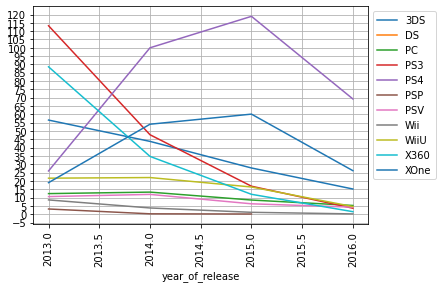

In [33]:
data.pivot_table(index='year_of_release', 
                 columns = 'platform', 
                 values='total_sales', 
                 aggfunc='sum').plot(kind='line', grid=True, rot=90)
plt.locator_params(axis='x', nbins = 10)
plt.locator_params(axis='y', nbins = 30)
plt.legend(bbox_to_anchor=(1, 1));

**Over the last 3 years, sales of PS4 and XOne have clearly increased, while sales of 3DS, PS3, and X360 have consistently declined.**

**The problem statement also mentions that the data for the year 2016 is incomplete. It is possible that the decline in sales for that year is due to the incompleteness of the data.**

In [34]:
data_platforms = data.query('platform == ["PS4", "XOne", "3DS", "PS3", "X360"]')

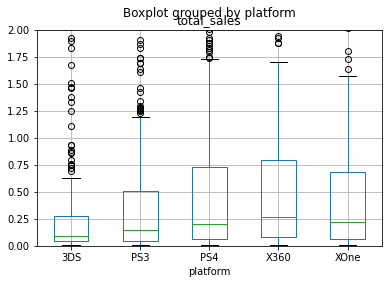

In [35]:
data_platforms.boxplot('total_sales', by='platform');
plt.ylim(0, 2); 

**Let's assess the platforms based on median sales: X360 and XOne are leading.**

**The median is located close to the center of the box for all 5 platforms. This indicates that the data is normally distributed.**

**Let's examine how user and critic reviews impact sales within one popular platform.**
**Plot a scatter plot and calculate the correlation between reviews and sales. Formulate conclusions based on the results.**

**XOne:**

In [36]:
data_XOne2 = data.query('platform == "XOne" and user_score.notna()')
print('коэффициент корреляции между суммарными продажами и оценкой критиков:', 
      data_XOne2['total_sales'].corr(data_XOne2['critic_score']))

коэффициент корреляции между суммарными продажами и оценкой критиков: 0.410422035612964


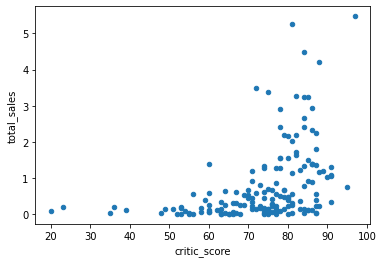

In [37]:
data_XOne2.plot(x='critic_score', y='total_sales', kind='scatter');

In [38]:
print('коэффициент корреляции между суммарными продажами и оценкой пользователей:', 
      data_XOne2['total_sales'].corr(data_XOne2['user_score'].astype(float)))

коэффициент корреляции между суммарными продажами и оценкой пользователей: -0.06892505328279415


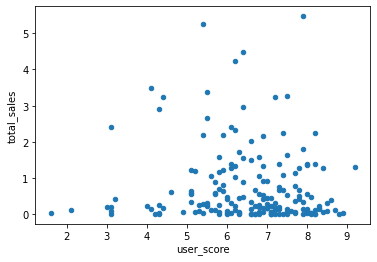

In [39]:
data_XOne2.plot(x='user_score', y='total_sales', kind='scatter');

In [40]:
# Соотнесите выводы с продажами игр на других платформах.

**PS3:**

In [41]:
data_PS32 = data.query('platform == "PS3" and user_score.notna()')
print('коэффициент корреляции между суммарными продажами и оценкой критиков:', 
      data_PS32['total_sales'].corr(data_PS32['critic_score']))

коэффициент корреляции между суммарными продажами и оценкой критиков: 0.3338066356506173


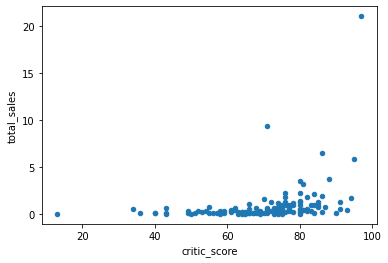

In [42]:
data_PS32.plot(x='critic_score', y='total_sales', kind='scatter');

In [43]:
print('коэффициент корреляции между суммарными продажами и оценкой пользователей:', 
      data_PS32['total_sales'].corr(data_PS32['user_score'].astype(float)))

коэффициент корреляции между суммарными продажами и оценкой пользователей: 0.0023944027357566907


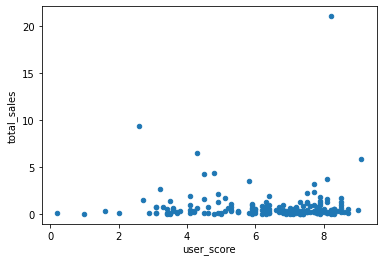

In [44]:
data_PS32.plot(x='user_score', y='total_sales', kind='scatter');

**3DS:**

In [45]:
data_3DS2 = data.query('platform == "3DS" and user_score.notna()')
print('коэффициент корреляции между суммарными продажами и оценкой пользователей:', 
      data_3DS2['total_sales'].corr(data['critic_score']))

коэффициент корреляции между суммарными продажами и оценкой пользователей: 0.33923492878531464


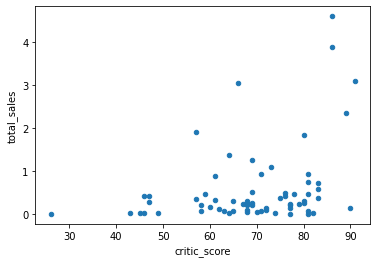

In [46]:
data_3DS2.plot(x='critic_score', y='total_sales', kind='scatter');

In [47]:
print('коэффициент корреляции между суммарными продажами и оценкой пользователей:', 
      data_3DS2['total_sales'].corr(data_3DS2['user_score'].astype(float)))

коэффициент корреляции между суммарными продажами и оценкой пользователей: 0.24150411773563016


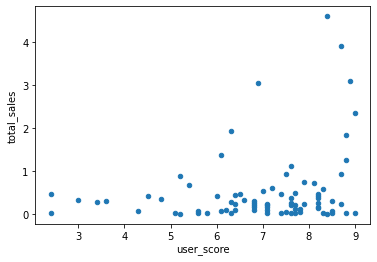

In [48]:
data_3DS2.plot(x='user_score', y='total_sales', kind='scatter');

**PS4:**

In [49]:
data_PS42 = data.query('platform == "PS4" and user_score.notna()')
print('коэффициент корреляции между суммарными продажами и оценкой критиков:', 
      data_PS42['total_sales'].corr(data_PS42['critic_score']))

коэффициент корреляции между суммарными продажами и оценкой критиков: 0.40589480145836676


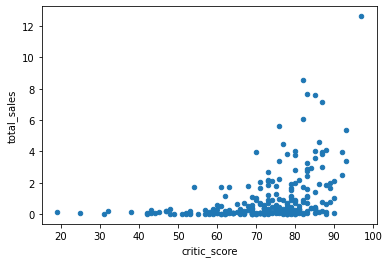

In [50]:
data_PS42.plot(x='critic_score', y='total_sales', kind='scatter');

In [51]:
print('коэффициент корреляции между суммарными продажами и оценкой пользователей:', 
      data_PS42['total_sales'].corr(data_PS42['user_score'].astype(float)))

коэффициент корреляции между суммарными продажами и оценкой пользователей: -0.03195711020455643


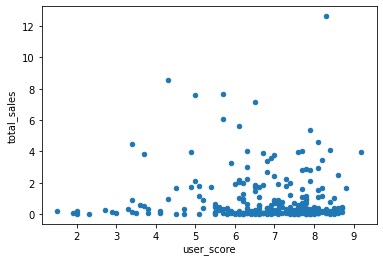

In [52]:
data_PS42.plot(x='user_score', y='total_sales', kind='scatter');

**X360:**

In [53]:
data_X3602 = data.query('platform == "X360" and user_score.notna()')
print('коэффициент корреляции между суммарными продажами и оценкой критиков:', 
      data_X3602['total_sales'].corr(data['critic_score']))

коэффициент корреляции между суммарными продажами и оценкой критиков: 0.3503445460228664


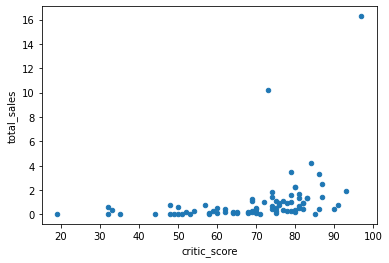

In [54]:
data_X3602.plot(x='critic_score', y='total_sales', kind='scatter');

In [55]:
print('коэффициент корреляции между суммарными продажами и оценкой пользователей:', 
      data_X3602['total_sales'].corr(data_X3602['user_score'].astype(float)))

коэффициент корреляции между суммарными продажами и оценкой пользователей: -0.011742185147181351


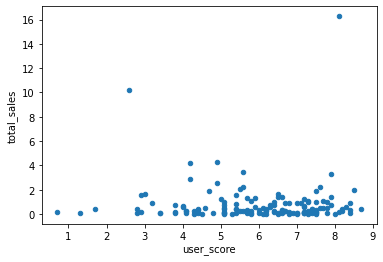

In [56]:
data_X3602.plot(x='user_score', y='total_sales', kind='scatter');

**Conclusion: Influence of Ratings on Sales:**

The best-selling platforms over the last 3 years are PS4, XOne, 3DS, PS3, and X360.

There is a weak correlation between global sales and critic ratings (0.33 - 0.41) for these platforms.

There is no significant correlation between global sales and user ratings (0.01 - 0.07) for all platforms, except for 3DS, where a weak correlation (0.24) is observed.

**Let's take a look at the overall distribution of games by genre:**

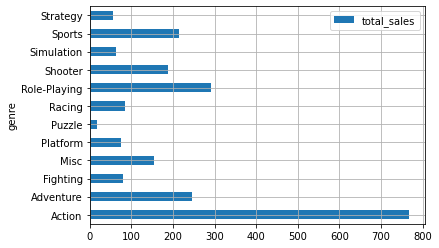

In [57]:
data.pivot_table(index='genre',
                 values='total_sales', 
                 aggfunc='count').plot(kind='barh', grid=True);

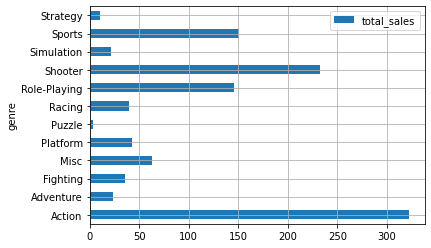

In [58]:
data.pivot_table(index='genre',
                 values='total_sales', 
                 aggfunc='sum').plot(kind='barh', grid=True);

**Conclusion from the bar chart of total sales values:**
Judging by the total sales, the genres that stand out the most in terms of both the number of games and the number of copies sold are Action, Sports, and Shooter. The genres that perform the lowest are Strategy, Puzzle, and Adventure.

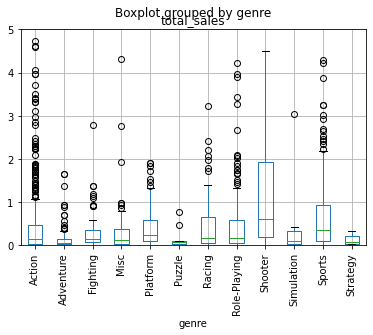

In [59]:
data_platforms.boxplot('total_sales', by='genre', rot=90);
plt.ylim(0, 5);

**Conclusion from the box plot:**
Based on the median sales, the genres Shooter and Sports are leading. The genres Puzzle and Adventure have the lowest performance.

**Difference between the total and median sales figures:**
As we can see from the box plot, the Action genre has many outliers. This explains why its sales figures in terms of both quantity and total sales are significantly higher than the others.

**Conclusion for Chapter 3:**
Critic reviews have a weak direct impact on sales.
User reviews have no significant impact on sales, except for the 3DS platform where a weak impact is observed.
The most profitable genres are Shooter and Sports.
The least profitable genres are Puzzle and Adventure.

## Task 1: Creating a profile of the typical user for each region

**Let's determine for each region (NA, EU, JP):**
The most popular platforms (top 5). Describe the differences in sales shares.

In [60]:
data.groupby(by=['platform']).sum().sort_values(by=['na_sales'], ascending=False).head()['na_sales']

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

In [61]:
data.groupby(by=['platform']).sum().sort_values(by=['eu_sales'], ascending=False).head()['eu_sales']

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

In [62]:
data.groupby(by=['platform']).sum().sort_values(by=['jp_sales'], ascending=False).head()['jp_sales']

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

**Conclusion:**
Users from North America and Europe prefer the same platforms, with a preference for home consoles like PS4, PS3, XOne, and X360. In Japan, domestic home consoles and mobile platforms like 3DS, PS3, and PSV are popular.

**The most popular genres (top 5) are:**

In [63]:
data.groupby(by=['genre']).sum().sort_values(by=['na_sales'], ascending=False).head()['na_sales']

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

In [64]:
data.groupby(by=['genre']).sum().sort_values(by=['eu_sales'], ascending=False).head()['eu_sales']

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

In [65]:
data.groupby(by=['genre']).sum().sort_values(by=['jp_sales'], ascending=False).head()['jp_sales']

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

**Conclusion:** In North America and Europe, the same genres are preferred, with Action, Shooter, and Sports being the most played. In Japan, Role-Playing games dominate with a significant margin, while Shooters are not as popular.

**Does the ESRB rating affect sales in a specific region?**

In [66]:
data.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')['na_sales'].sort_values(ascending=False)

rating
M          165.21
Unknown     89.42
E           79.05
E10+        54.24
T           49.79
Name: na_sales, dtype: float64

In [67]:
data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')['eu_sales'].sort_values(ascending=False)

rating
M          145.32
E           83.36
Unknown     78.91
E10+        42.69
T           41.95
Name: eu_sales, dtype: float64

In [68]:
data.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')['jp_sales'].sort_values(ascending=False)

rating
Unknown    85.05
T          20.59
E          15.14
M          14.11
E10+        5.89
Name: jp_sales, dtype: float64

**Conclusion regarding the ESRB rating:**

In North America and Europe, the best-selling ratings are M, E, and Unknown.

In Japan, the best-selling ratings are Unknown and T.

It is possible that the popularity of games with missing ratings in Japan can be attributed to the fact that the region has a different rating system than ESRB or lacks a rating system altogether.

**Conclusion for Task 1:**

Users from North America and Europe prefer the same platforms, with a preference for home consoles such as PS4, PS3, XOne, and X360. In Japan, they prefer domestic home and mobile platforms like 3DS, PS3, and PSV.
In North America and Europe, the preferred genres are Action, Shooter, and Sports. In Japan, Role-Playing games dominate, while shooters are less popular.

In North America and Europe, the best-selling ESRB ratings are M, E, and Unknown. In Japan, the best-selling ratings are Unknown and T. It is possible that the popularity of games with missing ratings in Japan can be attributed to a different or non-existent rating system in the region.





## Task 2. Hypothesis testing

**The average user ratings for Xbox One and PC platforms are the same:**

In [69]:
#check
data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

```
H_0: Пользовательский рейтинг (user_score) платформы XOne = Пользовательский рейтинг (user_score) платформы PC`
H_a: Пользовательский рейтинг (user_score) платформы XOne ≠ Пользовательский рейтинг (user_score) платформы PC`
alpha = 0.05
```

In [70]:
# results = вызов метода для проверки гипотезы
xbox = (data[data['platform'] =='XOne']['user_score']).dropna().astype(float)
pc =  (data[data['platform'] =='PC']['user_score']).dropna().astype(float)
results = st.ttest_ind(xbox, pc, equal_var=False)
# alpha = зададим значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран
print('p-значение:', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**The average user ratings for Action and Sports genres are different:**

In [71]:
#check
data['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

```
H_0: Пользовательский рейтинг (user_score) жанра Action = Пользовательский рейтинг (user_score) жанра Sports`
H_a: Пользовательский рейтинг (user_score) жанра Action ≠ Пользовательский рейтинг (user_score) жанра Sports`
alpha = 0.05
```

In [72]:
# results = вызов метода для проверки гипотезы
xbox = (data[data['genre'] =='Action']['user_score']).dropna().astype(float)
pc =  (data[data['genre'] =='Sports']['user_score']).dropna().astype(float)
results = st.ttest_ind(xbox, pc, equal_var=False)
# alpha = зададим значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран
print('p-значение:', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4460039700704318e-20
Отвергаем нулевую гипотезу


**Conclusion for Task 2:**

The average user ratings for the Xbox One and PC platforms are the same.

The average user ratings for the Action and Sports genres are different.

## Overall conclusion

- Critics' reviews have a weak direct impact on sales.
- User reviews do not have an impact on sales, except for the 3DS platform, where a weak influence can be observed.
- The most profitable genres are Sports and Shooter. The least profitable genres are Puzzle and Adventure.

**-----------------**

- Users from North America and Europe prefer the same platforms, and they enjoy home consoles like PS4, PS3, Xbox One, and Xbox 360. In Japan, players tend to use domestic home consoles and mobile platforms such as 3DS, PS3, and PS Vita.
- In North America and Europe, the preferred genres are Action, Shooter, and Sports. In Japan, Role-Playing games dominate the market, while shooters are not as popular.
- The highest-selling ratings in North America and Europe are M, E, and Unknown. In Japan, the best-selling ratings are Unknown and T.

**------------------**

- The average user ratings for Xbox One and PC platforms are the same.
- The average user ratings for the Action and Sports genres are different.

**------------------**

**Thus, the success of a game is influenced by:**
- Critic reviews
- Profitability: the most profitable genres are Sports and Shooter
- Platform affiliation: plug-in home consoles are popular in Europe and North America, while mobile consoles are popular in Japan
- Popularity: Action, Shooter, and Sports genres are popular in Europe and North America, while Role-Playing genre is popular in Japan.

**Recommendations:**
- When selecting a game for promotion, pay attention to the target region it will be distributed in.
- Choose genres based on the region. For Europe and North America, consider Action, Shooter, and Sports genres. For Japan, prioritize Role-Playing and Action genres.
- Select the platform based on the region: PS4, PS3, XOne, X360 for Europe and North America; 3DS, PS3, PSV for Japan.
- Consider the rating affiliation: M, E, and Unknown for Europe and North America; Unknown and T for Japan. However, additional research may be required for the Japanese market, as it operates under a different rating system.
- Pay attention to critic reviews.